# Stock Portfolio Optimization Tool Using AI

# #Data exploration

In [19]:
import pandas as pd

#dataFileName = input("Please enter the name of the data file.")
#print(dataFileName)

#stock_data = pd.read_csv("Stocks/"+dataFileName+".csv")
stock_data = pd.read_csv("Stocks/prices.csv")
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
stock_data.dropna()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [21]:
stock_data.isnull()

,date,symbol,open,close,low,high,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
851259,False,False,False,False,False,False,False
851260,False,False,False,False,False,False,False
851261,False,False,False,False,False,False,False
851262,False,False,False,False,False,False,False


In [22]:
stock_data.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [23]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null datetime64[ns]
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [24]:
stock_data.tail(n=2)

,date,symbol,open,close,low,high,volume
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.59,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.48,705100.0


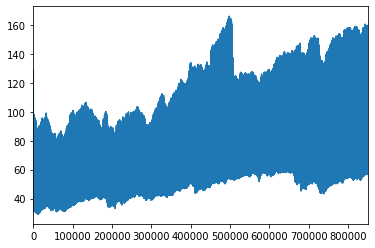

In [25]:
stock_data['open'].rolling(25).mean().plot()

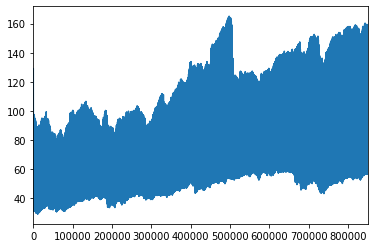

In [26]:
stock_data['close'].rolling(25).mean().plot()

In [27]:
stock_data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [29]:
graph_df = pd.DataFrame()

for symbol in stock_data['symbol'].unique():
    print(symbol)
    symbol_df = stock_data.copy()[stock_data['symbol']==symbol]
    symbol_df.set_index("date", inplace=True)
    symbol_df.sort_index(inplace=True)
    symbol_df[f'{symbol}_close25ma'] = symbol_df['close'].rolling(25).mean()
    symbol_df[f'{symbol}_open25ma'] = symbol_df['open'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = symbol_df[[f'{symbol}_close25ma']]
        
    else:
        graph_df = graph_df.join(symbol_df[f'{symbol}_close25ma'])
    

WLTW
A
AAL
AAP
AAPL
ABC
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AET
AFL
AGN
AIG
AIZ
AJG
AKAM
ALB
ALK
ALL
ALXN
AMAT
AME
AMG
AMGN
AMP
AMT
AMZN
AN
ANTM
AON
APA
APC
APD
APH
ARNC
ATVI
AVB
AVGO
AVY
AWK
AXP
AYI
AZO
BA
BAC
BAX
BBBY
BBT
BBY
BCR
BDX
BEN
BHI
BIIB
BK
BLK
BLL
BMY
BSX
BWA
BXP
C
CA
CAG
CAH
CAT
CB
CBG
CBS
CCI
CCL
CELG
CERN
CF
CHD
CHK
CHRW
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COH
COL
COO
COP
COST
CPB
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DLR
DLTR
DNB
DOV
DOW
DPS
DRI
DTE
DUK
DVA
DVN
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
ENDP
EOG
EQIX
EQR
EQT
ES
ESRX
ESS
ETFC
ETN
ETR
EW
EXC
EXPD
EXPE
EXR
F
FAST
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FL
FLIR
FLR
FLS
FMC
FOX
FOXA
FRT
FSLR
FTI
FTR
GD
GE
GGP
GILD
GIS
GLW
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GT
GWW
HAL
HAR
HAS
HBAN
HBI
HCN
HCP
HD
HES
HIG
HOG
HOLX
HON
HP
HPQ
HRB
HRL
HRS
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IFF
ILMN
INTC
INTU
IP
IPG
IR
IRM
ISRG
ITW
IVZ
JBHT
JCI
JEC
JNJ
JNPR
JPM
JWN
K
KEY
KIM


In [30]:
graph_df.head()

,WLTW_close25ma,A_close25ma,AAL_close25ma,AAP_close25ma,AAPL_close25ma,ABC_close25ma,ABT_close25ma,ACN_close25ma,ADBE_close25ma,ADI_close25ma,...,CFG_close25ma,NAVI_close25ma,QRVO_close25ma,SYF_close25ma,WRK_close25ma,KHC_close25ma,PYPL_close25ma,HPE_close25ma,CSRA_close25ma,FTV_close25ma
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,NaN,41.1012,42.9428,152.781600,111.3740,101.905199,44.8720,105.708401,92.625200,57.2352,...,26.3296,11.9418,54.3928,30.6460,46.627200,72.4538,35.6706,14.8352,28.6772,NaN
2016-01-06,NaN,41.0576,42.9416,152.160400,110.6700,102.030799,44.7776,105.506001,92.607600,56.8396,...,26.2756,11.9026,53.8548,30.5688,46.371199,72.4474,35.6194,14.8328,28.5392,NaN
2016-01-07,NaN,40.9752,42.8292,151.620001,109.8344,101.991999,44.6208,105.147201,92.469999,56.3936,...,26.1992,11.8234,53.3588,30.4372,46.082000,72.3446,35.5378,14.7568,28.4152,NaN
2016-01-08,NaN,40.9020,42.6912,151.125201,109.0616,101.956399,44.4388,104.771601,92.303200,55.9632,...,26.0864,11.7514,52.7992,30.3172,45.744400,72.2702,35.4394,14.7004,28.2924,NaN
2016-01-11,NaN,40.8136,42.6036,150.816001,108.3948,101.770399,44.3020,104.503601,92.281999,55.6480,...,25.9836,11.6818,52.2444,30.2216,45.313600,72.3026,35.3918,14.6460,28.2400,NaN
